### 图像阈值处理

在图像处理中，阈值处理是一种常用的技术，用于将图像转换为二值图像（即黑白图像）。通过设定一个阈值，可以将图像中的像素分为两类：高于阈值的像素和低于阈值的像素

OpenCV 提供了多种阈值处理方法，有以下三种常见的阈值处理技术：
- 简单阈值处理
- 自适应阈值处理
- Otsu's 二值化

### 简单阈值处理 threshold()

简单阈值处理通过设定一个固定的阈值，将图像中的像素分为两类

函数原型：

`retval, dst = cv2.threshold(src, thresh, maxval, type)`

参数说明：

- src: 输入图像，通常为灰度图像
- thresh: 设定的阈值
- maxval: 当像素值超过（或小于，根据类型）阈值时，赋予的新值
- type: 阈值处理的类型，常见的类型有：
    - `cv2.THRESH_BINARY`: 如果像素值大于阈值，则赋予 maxval，否则赋予 0
    - `cv2.THRESH_BINARY_INV`: 与 `cv2.THRESH_BINARY`相反，如果像素值大于阈值，则赋予 0，否则赋予 maxval
    - `cv2.THRESH_TRUNC`: 如果像素值大于阈值，则赋予阈值，否则保持不变
    - `cv2.THRESH_TOZERO`: 如果像素值大于阈值，则保持不变，否则赋予 0
    - `cv2.THRESH_TOZERO_INV`: 与 `cv2.THRESH_TOZERO` 相反，如果像素值大于阈值，则赋予 0，否则保持不变

返回值：

- retval: 实际使用的阈值（对于简单阈值处理，通常与输入的 thresh 相同）
- dst: 输出的二值图像

In [2]:
import cv2
import matplotlib.pyplot as plt
from my_function import imshow,show_gray_hist

In [3]:
gray=cv2.cvtColor(cv2.imread("./images/bookpage.jpg"),cv2.COLOR_BGR2GRAY)

_,dst=cv2.threshold(gray,10,255,cv2.THRESH_BINARY)

imshow(gray=gray,dst=dst)

### 自适应阈值处理 adaptiveThreshold()

在某些情况下，图像的亮度分布不均匀，使用固定的阈值可能无法得到理想的效果。自适应阈值处理通过为图像的不同区域计算不同的阈值，从而更好地处理这种情况

函数原型：

`dst = cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)`

参数说明：

- src: 输入图像，通常为灰度图像
- maxValue: 当像素值超过（或小于，根据类型）阈值时，赋予的新值
- adaptiveMethod: 自适应阈值计算方法，常见的类型有：
  - `cv2.ADAPTIVE_THRESH_MEAN_C`: 阈值是邻域的平均值减去常数 C
  - `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`: 阈值是邻域的加权平均值减去常数 C，权重由高斯函数确定
- thresholdType: 阈值处理的类型，通常为 `cv2.THRESH_BINARY` 或 `cv2.- THRESH_BINARY_INV`
- blockSize: 计算阈值时使用的邻域大小，必须为奇数
- C: 从平均值或加权平均值中减去的常数

返回值：

- dst: 输出的二值图像

In [4]:
bookpage=cv2.cvtColor(cv2.imread("./images/bookpage.jpg"),cv2.COLOR_BGR2GRAY)

_,threshold=cv2.threshold(bookpage,10,255,cv2.THRESH_BINARY)
adaptiveThreshold_mean=cv2.adaptiveThreshold(bookpage,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
adaptiveThreshold_gauss=cv2.adaptiveThreshold(bookpage,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

imshow(threshold=threshold,adaptiveThreshold_mean=adaptiveThreshold_mean,adaptiveThreshold_gauss=adaptiveThreshold_gauss)

### Otsu's二值化 cv2.threshold() with cv2.THRESH_OTSU

Otsu's 二值化是一种自动确定阈值的方法。它通过最大化类间方差来找到最佳的全局阈值，适用于双峰图像（即图像直方图有两个明显的峰值）
> 如果物体与背景的灰度值对比明显，灰度直方图就会包含双峰(bimodal histogram)，它们分别为图像的前景和背景

函数原型：

`retval, dst = cv2.threshold(src, 0, maxval, cv2.THRESH_BINARY + cv2.THRESH_OTSU)`

参数说明：

- src: 输入图像，通常为灰度图像
- thresh: 由于 Otsu's 方法会自动确定阈值，因此该参数通常设置为 0
- maxval: 当像素值超过（或小于，根据类型）阈值时，赋予的新值
- type: 阈值处理的类型，通常为 `cv2.THRESH_BINARY` 或 `cv2.THRESH_BINARY_INV`，并加上 `cv2.THRESH_OTSU`

返回值：

- retval: 计算得到的最佳阈值
- dst: 输出的二值图像

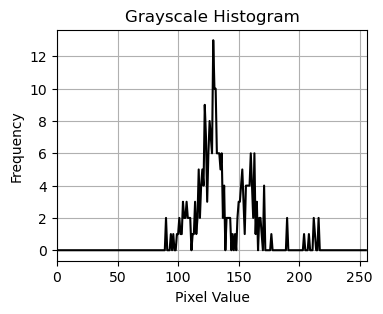

In [5]:
gray=cv2.imread("./images/lena_gray.png",cv2.IMREAD_GRAYSCALE)
show_gray_hist(gray)

In [37]:
threshold,dst=cv2.threshold(gray,100,255,cv2.THRESH_BINARY)
threshold_otsu,otsu=cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

print(f"简单阈值处理阈值：{threshold} \n OTSU阈值: {threshold_otsu}")
imshow(dst=dst,otsu=otsu)

简单阈值处理阈值：100.0 
 OTSU阈值: 117.0
